Documentation on numpy, scipy, opencv an matplotlib.

In [27]:
import numpy as np
import cv2 as cv
import scipy
import scipy.special
import scipy.spatial
import scipy.stats
import scipy.ndimage
import matplotlib
import matplotlib.patches
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.path import Path

import utility as util

def rotation_2d(theta):
    return np.array([
            [ np.cos(theta), np.sin(theta)],
            [-np.sin(theta), np.cos(theta)]])

## Array Creation and Basic Usage

In [3]:
# create an array using an iterable
np.array(range(5))

array([0, 1, 2, 3, 4])

In [13]:
# De-referencing arrays
a = np.arange(3)
a1, a2, a3 = a
b1, b2, b3 = a.T
# a, a1, a2, a3, a.T, b1, b2, b3
print(a)

[0 1 2]


In [15]:
# create a matrix and fill with a constant
np.full((2, 3), 1.2), np.full(2, 1.2)

(array([[1.2, 1.2, 1.2],
        [1.2, 1.2, 1.2]]),
 array([1.2, 1.2]))

In [16]:
# create an identity matrix
np.diag(np.full(4, 1))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [120]:
# create a meshgrid
N = 3
X = np.linspace(0, 2, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)
X, Y

(array([[0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.]]),
 array([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]]))

## Mathematical Operations

In [2]:
# Sigmoid function (applied to an array)
def sigmoid(z):
    return 1 / (np.exp(-z) + 1)

sigmoid(np.array([1,2,3]))

array([0.73105858, 0.88079708, 0.95257413])

In [3]:
# Softplus function (applied to an array)
def softplus(z):
    return np.log(1 + np.exp(z))

softplus(np.array([1,2,3]))

array([1.31326169, 2.12692801, 3.04858735])

In [3]:
# Array reshaping, shape and dimension
A = np.arange(6).reshape((2, 3))
A, A.shape, A.ndim

(array([[0, 1, 2],
        [3, 4, 5]]),
 (2, 3),
 2)

In [34]:
# Subarrays indexing
a = np.arange(8)
a, a[3], a[:3], a[3:], a[3:6], a[3:6:2], a[3::2]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 3,
 array([0, 1, 2]),
 array([3, 4, 5, 6, 7]),
 array([3, 4, 5]),
 array([3, 5]),
 array([3, 5, 7]))

In [3]:
# Vector-scalar operations
a = np.arange(3) + 1
a, 2 * a, a / 2, 2 / a, a + 2, a - 2, a**2

(array([1, 2, 3]),
 array([2, 4, 6]),
 array([0.5, 1. , 1.5]),
 array([2.        , 1.        , 0.66666667]),
 array([3, 4, 5]),
 array([-1,  0,  1]),
 array([1, 4, 9]))

In [41]:
# In-place mutation of array
a = np.arange(4) + 1
a[0] *= -1
a[1] /= 2
a[2] += 1
a[3] -= 1
a

array([-1,  1,  4,  3])

In [14]:
# Row wise application of b on A
A = np.array([np.arange(3), np.arange(3) + 1, np.arange(3) + 2, np.arange(3) + 3])
b = np.array([-1, -1/2, 1/2, 2])
A, b, A + b[:, None], A * b[:, None], A / b[:, None]

(array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]),
 array([-1. , -0.5,  0.5,  2. ]),
 array([[-1. ,  0. ,  1. ],
        [ 0.5,  1.5,  2.5],
        [ 2.5,  3.5,  4.5],
        [ 5. ,  6. ,  7. ]]),
 array([[-0. , -1. , -2. ],
        [-0.5, -1. , -1.5],
        [ 1. ,  1.5,  2. ],
        [ 6. ,  8. , 10. ]]),
 array([[-0. , -1. , -2. ],
        [-2. , -4. , -6. ],
        [ 4. ,  6. ,  8. ],
        [ 1.5,  2. ,  2.5]]))

In [65]:
# The * operation is the Hadamard product on vectors
a = np.array([1,2,3])
b = np.array([4,5,6])
a * b, np.einsum("i,i->i", a, b)

(array([ 4, 10, 18]), array([ 4, 10, 18]))

In [62]:
# Dot product
# a.dot(b) is equivalent to np.dot(a, b)
# The @ operation is also a dot product on vectors
a = np.array([1,2,3])
b = np.array([4,5,6])
a.dot(b), a @ b, np.einsum("i,i->", a, b)

(32, 32, 32)

In [19]:
# Matrix-vector multiplication
A = np.array([
    [1, 2],
    [4, 2]])
b = np.array([1,2])
A @ b, np.einsum("ij,j->i", A, b)

(array([5, 8]), array([5, 8]))

In [6]:
# Matrix-vector operations
A = np.array([
    [1, 2],
    [3, 1]])
b = np.array([2,-1])
A + b, A - b

(array([[3, 1],
        [5, 0]]),
 array([[-1,  3],
        [ 1,  2]]))

In [4]:
# Matrix-matrix multiplication
A = np.array([
    [1, 2],
    [4, 2]])
B = np.array([
    [2, 0],
    [0, -1]])

def matmul(A, B):
    C = np.zeros((A.shape[0], B.shape[1]), dtype=A.dtype)
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i,j] += A[i,k]*B[k,j]
    return C

matmul(A, B), A @ B, np.einsum("ij,jk->ik", A, B)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[ 2, -2],
        [ 8, -2]]),
 array([[ 2, -2],
        [ 8, -2]]))

In [30]:
# Matrix-vector multiplication broadcasted across multiple matrices
A = np.array([
    [
        [2, 0],
        [0,-1],
    ],[
        [1,2],
        [1,0]
    ]
])
b = np.array([1,2])
A[0] @ b, A[1] @ b, A @ b

(array([ 2, -2]),
 array([5, 1]),
 array([[ 2, -2],
        [ 5,  1]]))

In [76]:
# Batched Matrix-vector multiplication using np.einsum()
A = np.array([
    [
        [2, 0],
        [0,-1],
    ],[
        [1,2],
        [1,0]
    ]
])
b = np.array([
    [1,2],
    [-1,1]
])
A[0] @ b[0], A[1] @ b[1], np.einsum("...jk, ...k ->...j", A, b)

(array([ 2, -2]),
 array([ 1, -1]),
 array([[ 2, -2],
        [ 1, -1]]))

In [122]:
# Batched Matrix-matrix multiplication using np.einsum()
A = np.array([
    [
        [1, 2],
        [4, 2]
    ],[
        [3, 1],
        [2,-1]
    ]
])
B = np.array([
    [
        [2, 0],
        [0, -1]
    ],[
        [2, 1],
        [1, 0]
    ]
])
A[0] @ B[0], A[1] @ B[1], np.einsum("...ij,...jk->...ik", A, B)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[7, 3],
        [3, 2]]),
 array([[[ 2, -2],
         [ 8, -2]],
 
        [[ 7,  3],
         [ 3,  2]]]))

In [123]:
# Matrix to Batched matrix multiplication using np.einsum()
A = np.array([
        [1, 2],
        [4, 2]])
B = np.array([
    [
        [2, 0],
        [0, -1]
    ],[
        [2, 1],
        [1, 0]
    ]
])
A @ B[0], A @ B[1], B[0] @ A, B[1] @ A, np.einsum("ij,...jk->...ik", A, B), np.einsum("...ij,jk->...ik", B, A)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[ 4,  1],
        [10,  4]]),
 array([[ 2,  4],
        [-4, -2]]),
 array([[6, 6],
        [1, 2]]),
 array([[[ 2, -2],
         [ 8, -2]],
 
        [[ 4,  1],
         [10,  4]]]),
 array([[[ 2,  4],
         [-4, -2]],
 
        [[ 6,  6],
         [ 1,  2]]]))

In [132]:
# Matrix to batched vector multiplication using np.einsum()
A = np.array([
    [1,2],
    [1,0]
])
b = np.array([[1,2], [-1,1], [3,-1]])
A @ b[0], A @ b[1], A @ b[2], np.einsum("jk, ...k ->...j", A, b)

(array([5, 1]),
 array([ 1, -1]),
 array([1, 3]),
 array([[ 5,  1],
        [ 1, -1],
        [ 1,  3]]))

In [8]:
# Trace of matrix
A = np.array([
    [
        [1, 2],
        [4, 2]
    ],[
        [3, 1],
        [2,-1]
    ]
])
np.trace(A[0]), np.trace(A[1]), np.einsum("...ii", A)

(3, 2, array([3, 2]))

In [34]:
# Operations on rows between arrays.
# A * b means element-wise multiplication of A[i] by b for each row A[i] of A
# A / b means element-wise division       of A[i] by b for each row A[i] of A
A = np.array([
    [1,2],
    [3,4],
    [5,6]])
b = np.array([1, -2])
A * b, np.einsum("ji,i->ji", A, b), A / b

(array([[  1,  -4],
        [  3,  -8],
        [  5, -12]]),
 array([[  1,  -4],
        [  3,  -8],
        [  5, -12]]),
 array([[ 1., -1.],
        [ 3., -2.],
        [ 5., -3.]]))

In [38]:
# take the power of bases b by their exponents e element-wise.
# np.power() requires exponent to be positive integers.
# for more general exponents use np.float_power()
b = np.array([2,-2,2,-2, 0.5, -0.5])
e = np.array([2,2,3,3,2,2])
np.power(b, e)

array([ 4.  ,  4.  ,  8.  , -8.  ,  0.25,  0.25])

In [112]:
# Summing up an axis of an array
A = np.array([
    [1,2],
    [3,4],
    [5,6]])
print("Sum/product/max of all entries of A")
print(np.sum(A), np.prod(A), np.max(A))
print("Sum/product/max the columns of A")
print(np.sum(A, axis=0), np.prod(A, axis=0), np.max(A, axis=0))
print("Sum the rows of A")
print(np.sum(A, axis=1), np.prod(A, axis=1), np.max(A, axis=1))

Sum/product/max of all entries of A
21 720 6
Sum/product/max the columns of A
[ 9 12] [15 48] [5 6]
Sum the rows of A
[ 3  7 11] [ 2 12 30] [2 4 6]


In [49]:
# Computing the determinant of an array of 2D matrices
B = []
A1 = rotation_2d(np.pi / 4)
B.append(A1)
A2 = rotation_2d(np.pi / 3)
A2[0,0] *= 2; A2[1,1] *= 2
B.append(A2)
A3 = rotation_2d(4*np.pi / 3)
A3[0,0] *= 1.2; A3[1,1] *= 10
B.append(A3)
B = np.stack(B)
np.linalg.det(A1), np.linalg.det(A2), np.linalg.det(A3), np.linalg.det(B)

(1.0, 1.7500000000000004, 3.7500000000000044, array([1.  , 1.75, 3.75]))

In [50]:
# Computing the condition number of an array of 2D matrices
B = []
A1 = rotation_2d(np.pi / 4)
B.append(A1)
A2 = rotation_2d(np.pi / 3)
A2[0,0] *= 2; A2[1,1] *= 2
B.append(A2)
A3 = rotation_2d(4*np.pi / 3)
A3[0,0] *= 1.2; A3[1,1] *= 10
B.append(A3)
B = np.stack(B)
np.linalg.cond(A1), np.linalg.cond(A2), np.linalg.cond(A3), np.linalg.cond(B)

(1.0,
 1.0000000000000002,
 7.020221008795337,
 array([1.        , 1.        , 7.02022101]))

In [149]:
# checking that matrix is positive semi-definite

def is_positive_semidefinite(X):
    """Check that a matrix is positive semidefinite
    
    Based on:
    https://stackoverflow.com/a/63911811
    """
    if X.shape[0] != X.shape[1]:
        return False
    if not np.all( X - X.T == 0 ):
        return False
    try:
        regularized_X = X + np.eye(X.shape[0]) * 1e-14
        np.linalg.cholesky(regularized_X)
    except np.linalg.linalg.LinAlgError as err:
        if "Matrix is not positive definite"  == str(err):
            return False
        raise err
    return True

def is_positive_definite(X):
    """Check that a matrix is positive definite
    
    Based on:
    https://stackoverflow.com/a/63911811
    """
    if X.shape[0] != X.shape[1]:
        return False
    if not np.all( X - X.T == 0 ):
        return False
    try:
        np.linalg.cholesky(X)
    except np.linalg.linalg.LinAlgError as err:
        if "Matrix is not positive definite"  == str(err):
            return False
        raise err
    return True

A = np.array([[2,1],[1,2]])
B = np.array([[0,1],[1,0]])
C = np.array([[2,1],[2,2]])
D = np.array([[2,0],[0,0]])
np.linalg.eigvals(A), is_positive_semidefinite(A), is_positive_definite(A), \
        np.linalg.eigvals(B), is_positive_semidefinite(B), is_positive_definite(B), \
        np.linalg.eigvals(C), is_positive_semidefinite(C), is_positive_definite(C), \
        np.linalg.eigvals(D), is_positive_semidefinite(D), is_positive_definite(D)

(array([3., 1.]),
 True,
 True,
 array([ 1., -1.]),
 False,
 False,
 array([3.41421356, 0.58578644]),
 False,
 False,
 array([2., 0.]),
 True,
 False)

In [116]:
# Applying Cholesky decomposition to a positive semidefinite matrix 

A = np.array([[2,1,0.5],[1,3,0.3],[0.5,0.3,2]])
L = np.linalg.cholesky(A)
# Not that when A = L L^T then |A| = |L|^2 and |L| is the produce of L's diagonals.
A, L, L @ L.T, np.linalg.det(A), np.linalg.det(L)**2, np.linalg.det(L), np.prod(np.diag(L))

(array([[2. , 1. , 0.5],
        [1. , 3. , 0.3],
        [0.5, 0.3, 2. ]]),
 array([[1.41421356, 0.        , 0.        ],
        [0.70710678, 1.58113883, 0.        ],
        [0.35355339, 0.03162278, 1.3689412 ]]),
 array([[2. , 1. , 0.5],
        [1. , 3. , 0.3],
        [0.5, 0.3, 2. ]]),
 9.370000000000003,
 9.370000000000005,
 3.061045573002794,
 3.0610455730027937)

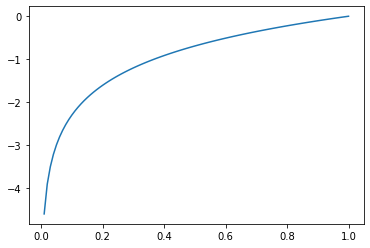

In [150]:
# element-wise log
X = np.linspace(1e-2, 1, 100)
log_X = np.log(X)
plt.plot(X, log_X)

In [39]:
def binary_decision(b, values=(-1, 1)):
    if isinstance(b, bool):
        return values[0]*int(not b) + values[1]*int(b)
    elif isinstance(b, list):
        return util.map_to_list(lambda x: binary_decision(x, values=values), b)
    elif isinstance(b, np.ndarray):
        if np.issubdtype(b.dtype, np.dtype('bool')):
            return values[0]*np.logical_not(b) + values[1]*b
        else:
            raise ValueError(f"Cannot handle dtype {str(b.dtype)}")
    else:
        raise NotImplementedError(f"Handing type {type(b)} not implemented.")

bs = np.array([True, False])
binary_decision(True), binary_decision(False), \
    binary_decision(True,  values=(0, 1)), \
    binary_decision(False, values=(0, 1)), \
    binary_decision(bs), binary_decision([True, False])

(1, -1, 1, 0, array([ 1, -1]), [1, -1])

## Numpy data types

In [27]:
# obtain max and min values of datatypes
info_float64 = np.finfo(np.float64)
print("float 64 max", info_float64.max, "min", info_float64.min)
info_int64   = np.iinfo(np.int64)
print("float 64 max", info_int64.max,   "min", info_int64.min)

float 64 max 1.7976931348623157e+308 min -1.7976931348623157e+308
float 64 max 9223372036854775807 min -9223372036854775808


In [28]:
# checking the data type of arrays
print("dtype of int array", np.array([1,2,3]).dtype )
print("dtype of float array", np.array([1.,2.,3.]).dtype )

dtype of int array int64
dtype of float array float64


In [29]:
# Using np.inf
print("inf upper bounds numbers", np.inf > 1)
print("inf fails as a lower bound", np.inf < 1)
print("negating and comparing inf is possible", np.inf > -np.inf)
print("sorting an array with inf", np.sort(np.array([np.inf, 5, 1, 4, 3]))  )
print("partitioning an array with inf", np.partition(np.array([np.inf, 5, 1, 4, 3]), 2)  )
print("multiply a positive and inf:", 2 * np.inf)
print("multiply a 0 and inf:", 0 * np.inf)

inf upper bounds numbers True
inf fails as a lower bound False
negating and comparing inf is possible True
sorting an array with inf [ 1.  3.  4.  5. inf]
partitioning an array with inf [ 1.  3.  4. inf  5.]
multiply a positive and inf: inf
multiply a 0 and inf: nan


In [30]:
# Using max float64 number
info_float64 = np.finfo(np.float64)
float64_max = info_float64.max

print("inf upper bounds numbers", float64_max > 1)
print("inf fails as a lower bound", float64_max < 1)
print("negating and comparing inf is possible", float64_max > -float64_max)
print("sorting an array with inf", np.sort(np.array([float64_max, 5, 1, 4, 3]))  )
print("partitioning an array with inf", np.partition(np.array([float64_max, 5, 1, 4, 3]), 2)  )
print("multiply a positive and inf:", 2 * float64_max)
print("add a positive and inf:", float64_max + 1)
print("multiply a 0 and inf:", 0 * float64_max)

inf upper bounds numbers True
inf fails as a lower bound False
negating and comparing inf is possible True
sorting an array with inf [1.00000000e+000 3.00000000e+000 4.00000000e+000 5.00000000e+000
 1.79769313e+308]
partitioning an array with inf [1.00000000e+000 3.00000000e+000 4.00000000e+000 1.79769313e+308
 5.00000000e+000]
multiply a positive and inf: inf
add a positive and inf: 1.7976931348623157e+308
multiply a 0 and inf: 0.0


<ipython-input-30-2eb8ffa5d3db>:10: RuntimeWarning: overflow encountered in double_scalars
  print("multiply a positive and inf:", 2 * float64_max)


In [31]:
# The smallest and largest float64 numbers.
info_float64 = np.finfo(np.float64)
float64_max = info_float64.max
-float64_max, float64_max

(-1.7976931348623157e+308, 1.7976931348623157e+308)

In [32]:
# The smallest and largest int64 numbers.
info_int64   = np.iinfo(np.int64)
int64_max = info_int64.max
-int64_max, int64_max

(-9223372036854775807, 9223372036854775807)

In [156]:
# Check that an array has any nan values
def has_nan(a):
    return np.isnan(np.sum(a))

A = np.arange(6, dtype=float).reshape(2,3)
B = A.copy()
B[1,1] = np.nan

A, has_nan(A), B, has_nan(B)

(array([[0., 1., 2.],
        [3., 4., 5.]]),
 False,
 array([[ 0.,  1.,  2.],
        [ 3., nan,  5.]]),
 True)

In [24]:
cov = np.array([[1, 0], [0, 2]])
X = np.random.multivariate_normal([-1, 1], cov, 100)
X[:10]
scipy.stats.tmean(X.T[0]), np.mean(X, axis=0)

(-0.9113335059414988, array([-0.91133351,  0.81485921]))

## Array Manipulation and Indexing

Everything that does not involve data operations.
How to index, reshape, combine, and search through arrays.

In [17]:
# indexing an array using '...', '-1' and ':'
A = np.arange(12).reshape((2,3,2))
B = A[...,-1,:]
A, A.shape, B.shape, B

(array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],
 
        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]),
 (2, 3, 2),
 (2, 2),
 array([[ 4,  5],
        [10, 11]]))

In [10]:
# Combine an ndarray to an ndarray
np.array([np.array([1,2]), np.array([3,4])])

array([[1, 2],
       [3, 4]])

In [9]:
# Stack two arrays (along axis 0 by default)
a = np.arange(3)
b = np.arange(3)
a, np.stack((a, b)), np.stack((a, b), axis=1)

(array([0, 1, 2]),
 array([[0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0],
        [1, 1],
        [2, 2]]))

In [8]:
# Concatenate two arrays (along axis 0 by default)
A = np.arange(4).reshape((2,2,))
B = np.arange(4).reshape((2,2,))
A, np.concatenate((A,B)), np.concatenate((A,B), axis=1)

(array([[0, 1],
        [2, 3]]),
 array([[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]]),
 array([[0, 1, 0, 1],
        [2, 3, 2, 3]]))

In [3]:
# select subarray using another array as indices
a = np.array([5,3,6,1,4])
b = np.array([0,1,3,4,2,0])
a[b]

array([5, 3, 1, 4, 6, 5])

In [4]:
# select row of a matrix using another array as indices
a = np.array([[1,2],[3,4],[5,6],[7,8]])
b = np.array([0,3,1,3,0,3])
a[b]

array([[1, 2],
       [7, 8],
       [3, 4],
       [7, 8],
       [1, 2],
       [7, 8]])

In [5]:
# Get the indices of entries in the array that satisfy a condition
# np.argwhere() returns a np.array
# np.nonzero() returns a tuple of numpy arrays 
a = np.concatenate((np.arange(3), np.arange(3)))
a, np.argwhere(a == 1), np.argwhere(a == 1).ravel(), np.nonzero(a == 1)

(array([0, 1, 2, 0, 1, 2]),
 array([[1],
        [4]]),
 array([1, 4]),
 (array([1, 4]),))

In [6]:
# Indexing from A using a list of indices B
A = np.arange(16).reshape((4,4,))
B = np.array([
        [1, 2],
        [0, 0],
        [3, 3],
        [2, 1],
        [1, 1]])
A, A[tuple(B.T)], A[B.T[0], B.T[1]]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([ 6,  0, 15,  9,  5]),
 array([ 6,  0, 15,  9,  5]))

In [7]:
# np.where() is an indicator function for value 2, np.unique() gets the unique values
a = np.array([1,2,3,2,1])
np.where(a == 2, 1, 0), np.unique(a)

(array([0, 1, 0, 1, 0]), array([1, 2, 3]))

In [17]:
# easily generate dummy arrays with arbitrary shapes
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
A = np.arange(12).reshape((3,2,2))
Ap = np.tile(A, (2,1))
A.shape, Ap.shape, A, Ap

((3, 2, 2),
 (3, 4, 2),
 array([[[ 0,  1],
         [ 2,  3]],
 
        [[ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11]]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 0,  1],
         [ 2,  3]],
 
        [[ 4,  5],
         [ 6,  7],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [ 8,  9],
         [10, 11]]]))

In [2]:
# Cartesian product of multiple arrays

# Based on:
# https://stackoverflow.com/questions/11144513/cartesian-product-of-x-and-y-array-points-into-single-array-of-2d-points

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

x = [np.arange(3), np.arange(2) + 1, np.arange(2) - 1]
print(x)
print()
print( cartesian_product(*x) )
print()

# Cartesian product of two arrays
x, y = x[0], x[1]
print(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))

[array([0, 1, 2]), array([1, 2]), array([-1,  0])]

[[ 0  1 -1]
 [ 0  1  0]
 [ 0  2 -1]
 [ 0  2  0]
 [ 1  1 -1]
 [ 1  1  0]
 [ 1  2 -1]
 [ 1  2  0]
 [ 2  1 -1]
 [ 2  1  0]
 [ 2  2 -1]
 [ 2  2  0]]

[[0 1]
 [1 1]
 [2 1]
 [0 2]
 [1 2]
 [2 2]]


In [3]:
# Combine dimensions
def combine_dims(a, start, count):
    """ Reshapes numpy array a by combining count dimensions, 
        starting at dimension index start """
    s = a.shape
    return np.reshape(a, s[:start] + (-1,) + s[start+count:])

A = np.arange(24).reshape((3, 2, 2, 2))
B = combine_dims(A, 1, 2)
A.shape, B.shape, A, B

((3, 2, 2, 2),
 (3, 4, 2),
 array([[[[ 0,  1],
          [ 2,  3]],
 
         [[ 4,  5],
          [ 6,  7]]],
 
 
        [[[ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15]]],
 
 
        [[[16, 17],
          [18, 19]],
 
         [[20, 21],
          [22, 23]]]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],
 
        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]))

In [19]:
# Combining Python list comprehension with array creation
n_steps = 5
np.array([step for step in range(n_steps) for _ in range(3)])

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

## Data Tabulation and Algorithms

In [11]:
# count the occurances of integers
np.bincount([0,0,1,1,0])

array([3, 2])

Text(0.5, 1.0, 'Histogram')

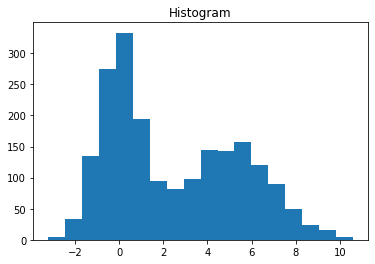

In [14]:
# Generate a histogram
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins='auto')
plt.title("Histogram")

In [20]:
# does partitioning of the array so that the 1 to k-1-th smallest elements in the array are 
# moved to the left of the array, the k-th smallest element is moved to the k-th place in the array
# and the rest of the larger elements are move to the right of the array
a = np.array([5,3,10,7,0,6,2,1])

np.testing.assert_array_equal(np.partition(a, 2), a[np.argpartition(a, 2)])

np.partition(a, 2)

array([ 0,  1,  2,  7,  5,  6, 10,  3])

In [28]:
# Sorting an array in place
a = np.random.randint(10, size=10)
b = a.copy()
b.sort()
a, b

(array([5, 6, 9, 8, 6, 0, 0, 2, 1, 8]), array([0, 0, 1, 2, 5, 6, 6, 8, 8, 9]))

In [29]:
# np.in1d() tests whether each element of a 1-D array is also present in a second array.
a = np.arange(25)
b = np.arange(5,15)
intersection_mask = np.in1d(a, b)
difference_mask = np.in1d(a, b, invert=True)
a[intersection_mask], a[difference_mask]

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]))

## Matrix Math

In [9]:
# Don't use np.matrix, instead convert it to np.array before doing operations with it.
# See:
# https://stackoverflow.com/questions/53254738/deprecation-status-of-the-numpy-matrix-class
A = np.matrix([
        [-0.5, 0],
        [ 0,   2]])
b = np.array([1,-1])
A @ b, np.array(A) @ b

(matrix([[-0.5, -2. ]]), array([-0.5, -2. ]))

## Scratch work

In [ ]:
A = np.full((3,2,4), 1)
A, np.apply_over_axes(np.sum, A, (0,1))

In [ ]:
# Based on:
# https://stackoverflow.com/questions/3654289/scipy-create-2d-polygon-mask

width, height=2000, 2000

# can't draw line segments
polygon=[(0.1*width, 0.1*height), (0.15*width, 0.7*height), (0.8*width, 0.75*height), (0.72*width, 0.15*height)]
poly_path=Path(polygon)

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) # coors.shape is (4000000,2)

mask = poly_path.contains_points(coors)
plt.imshow(mask.reshape(height, width))

In [ ]:
# Based on:
# https://stackoverflow.com/questions/18632276/how-to-draw-a-line-on-an-image-in-opencv
# API is:
# https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html

width, height = 150, 150
x1, y1 = 0, 0
x2, y2 = 100, 100
image = np.ones((height, width)) * 255
print(image.shape)

line_thickness = 1
img = cv.line(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

cv.fillPoly(imgage, pts, color[, lineType[, shift[, offset]]]	)

plt.imshow(image.T)

In [45]:
n = 4
A = np.arange(8*n).reshape((-1,8))
B = np.array([[2, 0],[0, 1], [0, 2]])
"""
array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])
"""
Ap = np.stack((A[:, 0:2].T, A[:, 2:4].T, A[:, 4:6].T, A[:, 6:8].T))
C = np.einsum("ij,...jk->...ik", B, Ap)
"""
array([[[ 0, 16, 32, 48],
        [ 1,  9, 17, 25],
        [ 2, 18, 34, 50]],

       [[ 4, 20, 36, 52],
        [ 3, 11, 19, 27],
        [ 6, 22, 38, 54]],

       [[ 8, 24, 40, 56],
        [ 5, 13, 21, 29],
        [10, 26, 42, 58]],

       [[12, 28, 44, 60],
        [ 7, 15, 23, 31],
        [14, 30, 46, 62]]])
"""
D = np.max(C, axis=(1,2))
# D, np.max(D, axis=1)
D

array([50, 54, 58, 62])

In [5]:
#
A = np.array([
    [1, 2],
    [3, 4]
])
A = np.expand_dims(A, axis=1)
A = np.tile(A, (2,1))

B = np.array([
    [2, 1],
    [-1, -2]
])
B = np.expand_dims(B, axis=1)
B = np.tile(B, (2,1))
B = np.swapaxes(B, 0, 1)
np.linalg.norm(A - B, axis=-1)

[[[ 2  1]
  [-1 -2]]

 [[ 2  1]
  [-1 -2]]]


array([[1.41421356, 4.47213595],
       [3.16227766, 7.21110255]])

In [35]:
# using argpartition along the last dimension to partition.
# by default np.partition and np.argpartition use axis -1.

A = np.array([
    [5,3,10,7,0,6,2,1],
    [8,5,10,4,0,6,2,11],
])

np.argpartition(A, 2)

# should give indices that make
# array([[ 0,  1,  2,  7,  5,  6, 10,  3],
#        [ 0,  2,  4, 10,  8,  6,  5, 11]])

array([[4, 7, 6, 3, 0, 5, 2, 1],
       [4, 6, 3, 2, 0, 5, 1, 7]])

In [34]:
# how to modify specific cells in a matrix using a matrix of indices.

A = np.array([
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
])
B = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
])
for idx in range(A.shape[0]):
    A[idx,B[idx]] = 1
A

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 1]])

In [37]:
# for a homework
W = np.array([
    [-2, 2, -1],
    [1, -2, 0]
])
v = np.array([3, 1])
x = np.array([-3, -2, 2])
z = W @ x.T
z
# sigmoid(z)
np.dot(v, sigmoid(z))


2.231058578630005

In [38]:
X = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
    [2,0],
    [0,0]
])
s = slice(2,4)
X[s]

array([[1, 0],
       [3, 1]])

In [39]:
X = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
    [2,0],
    [0,0]
])
ids = np.arange(X.shape[0])
np.random.shuffle(ids)
X = X[ids]
X, ids

(array([[2, 0],
        [3, 1],
        [1, 0],
        [0, 0],
        [0, 1],
        [1, 2]]),
 array([4, 3, 2, 5, 0, 1]))